In [1]:
# Wrangling/math/stats
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# System utils
import os
from pathlib import Path

# Get local file structure
CWD = os.getcwd()
CWD = Path(CWD)
DATA = CWD / "data"
MODEL_DATA = DATA / "data_for_modeling"
OPTIMIZATION = CWD/"optimization"

In [2]:
PARAMS =  [
    'param_ccp_alpha',
    'param_criterion',
    'param_max_depth',
    'param_min_samples_leaf',
    'param_min_samples_split',
    ]

In [3]:
appr_grid_results = pd.read_csv(OPTIMIZATION/"appraisal_DT_grid.csv")
purch_grid_results = pd.read_csv(OPTIMIZATION/"purchase_DT_grid.csv")

In [4]:
mean_rank = ((appr_grid_results["rank_test_neg_ordinal_cross_entropy"]*2) + appr_grid_results["rank_test_r2"])/3
ind = mean_rank == mean_rank[appr_grid_results["param_criterion"] == "squared_error"].min()
appr_grid_results[ind]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,...,std_test_r2,rank_test_r2,split0_test_neg_ordinal_cross_entropy,split1_test_neg_ordinal_cross_entropy,split2_test_neg_ordinal_cross_entropy,split3_test_neg_ordinal_cross_entropy,split4_test_neg_ordinal_cross_entropy,mean_test_neg_ordinal_cross_entropy,std_test_neg_ordinal_cross_entropy,rank_test_neg_ordinal_cross_entropy
224,21.037216,0.184936,2.471450,0.018473,0.0,squared_error,50.0,6,15,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",...,0.000586,102,-1.553069,-1.550201,-1.567434,-1.535353,-1.559037,-1.553019,0.010621,50
441,18.758702,0.199564,2.482792,0.055508,0.0,poisson,30.0,8,20,"{'ccp_alpha': 0.0, 'criterion': 'poisson', 'ma...",...,0.000559,2,-1.600382,-1.620430,-1.610121,-1.581368,-1.614300,-1.605320,0.013639,100


## Average Model Performance During Grid Search

In [5]:
mean_grid_r2_appr = appr_grid_results["mean_test_r2"].mean()
mean_grid_r2_purch = purch_grid_results["mean_test_r2"].mean()
print("Mean R2 Score for all models")
print(f"Appraisals = {mean_grid_r2_appr:.4F}")
print(f"Purchases = {mean_grid_r2_purch:.4F}")

Mean R2 Score for all models
Appraisals = 0.5291
Purchases = 0.3543


In [6]:
mean_grid_ord_ce_appr = appr_grid_results["mean_test_neg_ordinal_cross_entropy"].mean()
mean_grid_ord_ce_purch = purch_grid_results["mean_test_neg_ordinal_cross_entropy"].mean()
print("Mean Negative Ordinal Cross Entropy Loss for all models")
print(f"Appraisals = {mean_grid_ord_ce_appr:.4F}")
print(f"Purchases = {mean_grid_ord_ce_purch:.4F}")

Mean Negative Ordinal Cross Entropy Loss for all models
Appraisals = -3.8605
Purchases = -3.0610


## Comparing R2 Score and Ordinal Cross Entropy Loss
Note that ranks include score ties

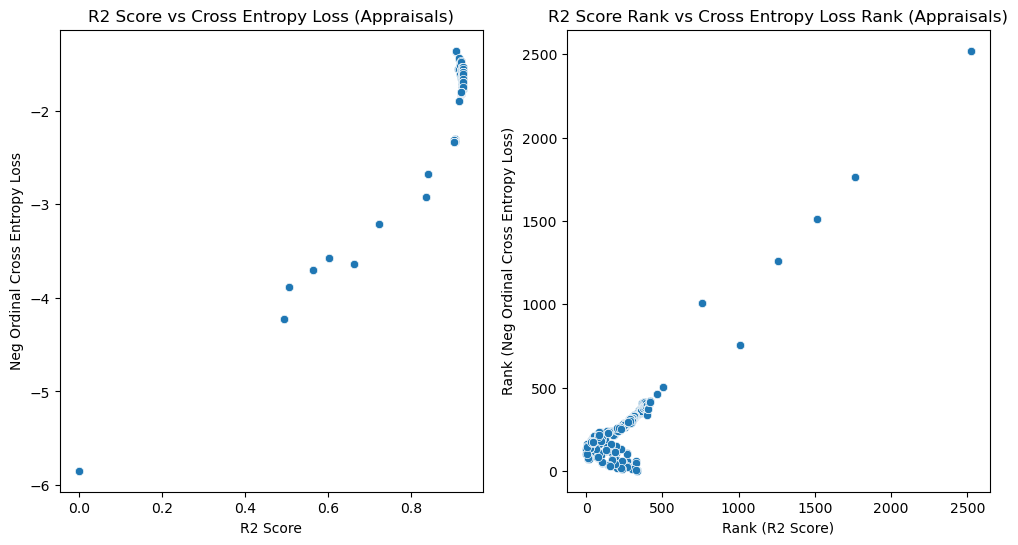

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.scatterplot(data=appr_grid_results, x="mean_test_r2", y="mean_test_neg_ordinal_cross_entropy", ax=axes[0])
axes[0].set_xlabel("R2 Score")
axes[0].set_ylabel("Neg Ordinal Cross Entropy Loss")
axes[0].set_title("R2 Score vs Cross Entropy Loss (Appraisals)")
sns.scatterplot(data=appr_grid_results, x="rank_test_r2", y="rank_test_neg_ordinal_cross_entropy", ax=axes[1])
axes[1].set_xlabel("Rank (R2 Score)")
axes[1].set_ylabel("Rank (Neg Ordinal Cross Entropy Loss)")
axes[1].set_title("R2 Score Rank vs Cross Entropy Loss Rank (Appraisals)")
plt.show()
plt.close()

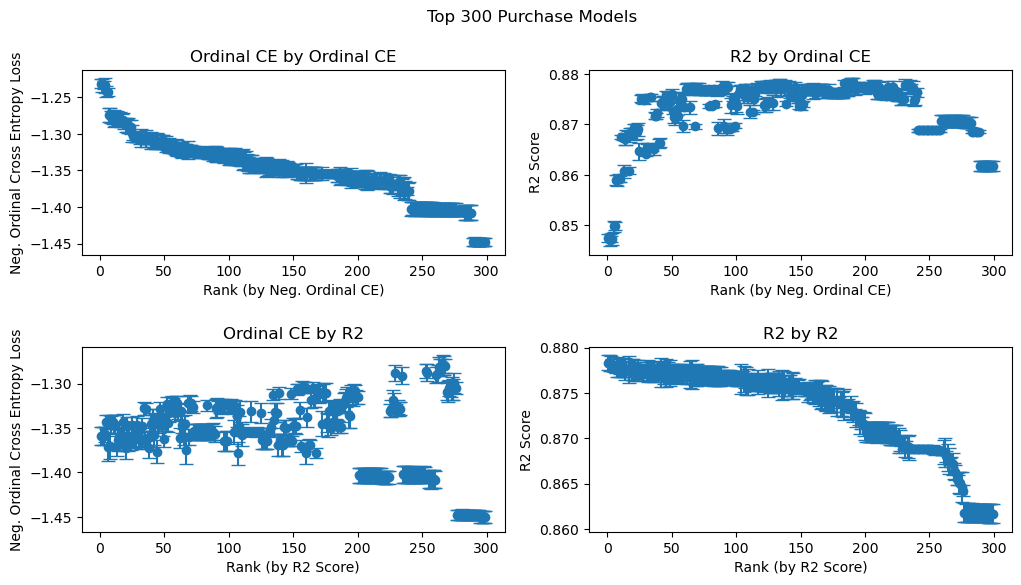

In [8]:
fig, axes = plt.subplots(2,2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1], "hspace":.5})
N = 300
top_ord_pur = purch_grid_results[purch_grid_results["rank_test_neg_ordinal_cross_entropy"] < N]

axes[0,0].errorbar(top_ord_pur["rank_test_neg_ordinal_cross_entropy"], top_ord_pur["mean_test_neg_ordinal_cross_entropy"], yerr=top_ord_pur["std_test_neg_ordinal_cross_entropy"], fmt='o', capsize=5)
axes[0,0].set_ylabel("Neg. Ordinal Cross Entropy Loss")
axes[0,0].set_xlabel("Rank (by Neg. Ordinal CE)")
axes[0,0].set_title("Ordinal CE by Ordinal CE")
axes[0,1].errorbar(top_ord_pur["rank_test_neg_ordinal_cross_entropy"], top_ord_pur["mean_test_r2"], yerr=top_ord_pur["std_test_r2"], fmt='o', capsize=5)
axes[0,1].set_ylabel("R2 Score")
axes[0,1].set_xlabel("Rank (by Neg. Ordinal CE)")
axes[0,1].set_title("R2 by Ordinal CE")

top_r2_pur = purch_grid_results[purch_grid_results["rank_test_r2"] < N]
axes[1,0].errorbar(top_r2_pur["rank_test_r2"], top_r2_pur["mean_test_neg_ordinal_cross_entropy"], yerr=top_r2_pur["std_test_neg_ordinal_cross_entropy"], fmt='o', capsize=5)
axes[1,0].set_ylabel("Neg. Ordinal Cross Entropy Loss")
axes[1,0].set_xlabel("Rank (by R2 Score)")
axes[1,0].set_title("Ordinal CE by R2")

axes[1,1].errorbar(top_r2_pur["rank_test_r2"], top_r2_pur["mean_test_r2"], yerr=top_r2_pur["std_test_r2"], fmt='o', capsize=5)
axes[1,1].set_ylabel("R2 Score")
axes[1,1].set_xlabel("Rank (by R2 Score)")
axes[1,1].set_title("R2 by R2")

plt.suptitle(f"Top {N} Purchase Models")
plt.show()
plt.close()

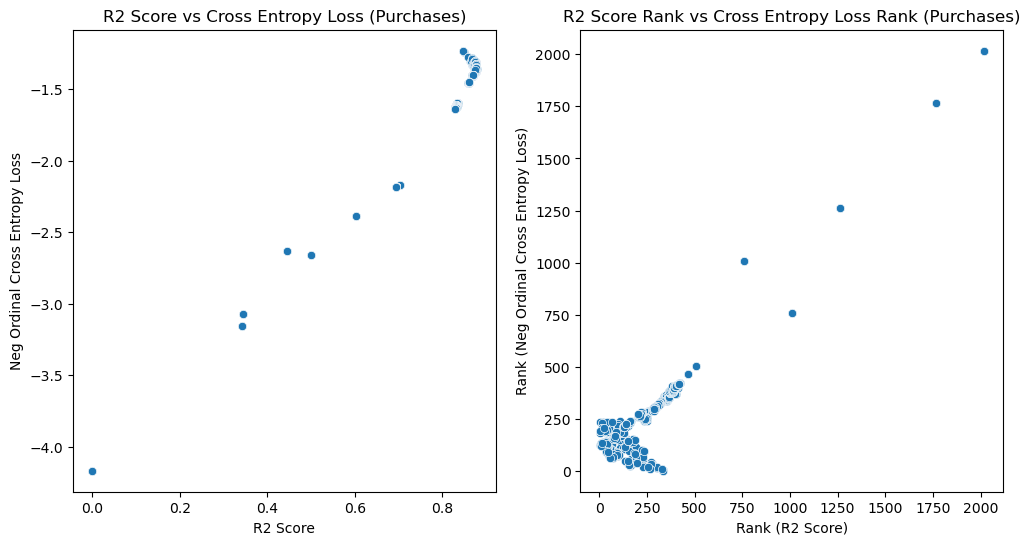

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.scatterplot(data=purch_grid_results, x="mean_test_r2", y="mean_test_neg_ordinal_cross_entropy", ax=axes[0])
axes[0].set_xlabel("R2 Score")
axes[0].set_ylabel("Neg Ordinal Cross Entropy Loss")
axes[0].set_title("R2 Score vs Cross Entropy Loss (Purchases)")
sns.scatterplot(data=purch_grid_results, x="rank_test_r2", y="rank_test_neg_ordinal_cross_entropy", ax=axes[1])
axes[1].set_xlabel("Rank (R2 Score)")
axes[1].set_ylabel("Rank (Neg Ordinal Cross Entropy Loss)")
axes[1].set_title("R2 Score Rank vs Cross Entropy Loss Rank (Purchases)")
plt.show()
plt.close()

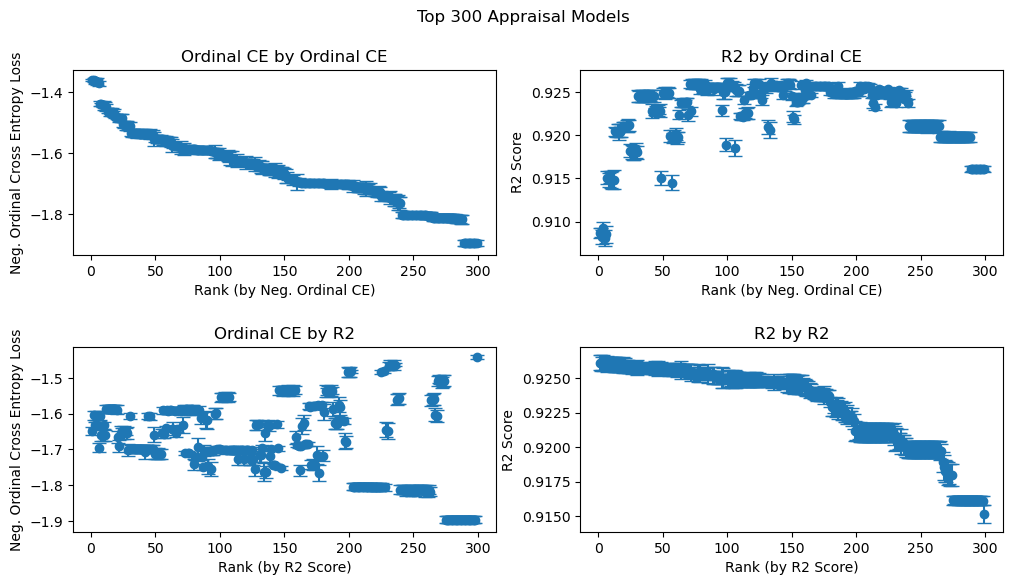

In [10]:
fig, axes = plt.subplots(2,2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1], "hspace":.5})
N = 300

top_ord_app = appr_grid_results[appr_grid_results["rank_test_neg_ordinal_cross_entropy"] < N]

axes[0,0].errorbar(top_ord_app["rank_test_neg_ordinal_cross_entropy"], top_ord_app["mean_test_neg_ordinal_cross_entropy"], yerr=top_ord_app["std_test_neg_ordinal_cross_entropy"], fmt='o', capsize=5)
axes[0,0].set_ylabel("Neg. Ordinal Cross Entropy Loss")
axes[0,0].set_xlabel("Rank (by Neg. Ordinal CE)")
axes[0,0].set_title("Ordinal CE by Ordinal CE")
axes[0,1].errorbar(top_ord_app["rank_test_neg_ordinal_cross_entropy"], top_ord_app["mean_test_r2"], yerr=top_ord_app["std_test_r2"], fmt='o', capsize=5)
axes[0,1].set_ylabel("R2 Score")
axes[0,1].set_xlabel("Rank (by Neg. Ordinal CE)")
axes[0,1].set_title("R2 by Ordinal CE")

top_r2_app = appr_grid_results[appr_grid_results["rank_test_r2"] < N]
axes[1,0].errorbar(top_r2_app["rank_test_r2"], top_r2_app["mean_test_neg_ordinal_cross_entropy"], yerr=top_r2_app["std_test_neg_ordinal_cross_entropy"], fmt='o', capsize=5)
axes[1,0].set_ylabel("Neg. Ordinal Cross Entropy Loss")
axes[1,0].set_xlabel("Rank (by R2 Score)")
axes[1,0].set_title("Ordinal CE by R2")

axes[1,1].errorbar(top_r2_app["rank_test_r2"], top_r2_app["mean_test_r2"], yerr=top_r2_app["std_test_r2"], fmt='o', capsize=5)
axes[1,1].set_ylabel("R2 Score")
axes[1,1].set_xlabel("Rank (by R2 Score)")
axes[1,1].set_title("R2 by R2")

plt.suptitle(f"Top {N} Appraisal Models")
plt.show()
plt.close()

Note that ranks/scores can be tied (especially evident in the rank plot)

#### Note that R2 score and -Ordinal CE Loss are fairly linear up until the highest performing examples (top 300 or so models, where R2 > .9), after this, Neg Ordinal CE Loss can continue to to increase, while R2 flatlines a bit.

## Impact of Error Criterion on Model Performance

In [11]:
group_vars = [p for p in PARAMS if "criterion" not in p]
score_metrics = ["mean_test_r2", "mean_test_neg_ordinal_cross_entropy"]
score_diff_mapper = {
    "mean_test_r2": "R2 Difference",
    "mean_test_neg_ordinal_cross_entropy": "Neg Ordinal CE Difference"
    }

appr_grid_results = appr_grid_results.sort_values("param_criterion")
appr_crit_diffs = appr_grid_results.groupby(group_vars)[score_metrics].diff()
appr_crit_diffs = appr_crit_diffs[~appr_crit_diffs.isna().any(axis=1)]
appr_crit_diffs = appr_crit_diffs.rename(columns=score_diff_mapper)
appr_crit_diffs["Model"] = "Appraisals"

purch_grid_results = purch_grid_results.sort_values("param_criterion")
purch_crit_diffs = purch_grid_results.groupby(group_vars)[score_metrics].diff()
purch_crit_diffs = purch_crit_diffs[~purch_crit_diffs.isna().any(axis=1)]
purch_crit_diffs = purch_crit_diffs.rename(columns=score_diff_mapper)
purch_crit_diffs["Model"] = "Purchases"

crit_diffs = pd.concat([appr_crit_diffs, purch_crit_diffs])

### R2 Score vs Criterion

#### R2 distribution by criterion and model type

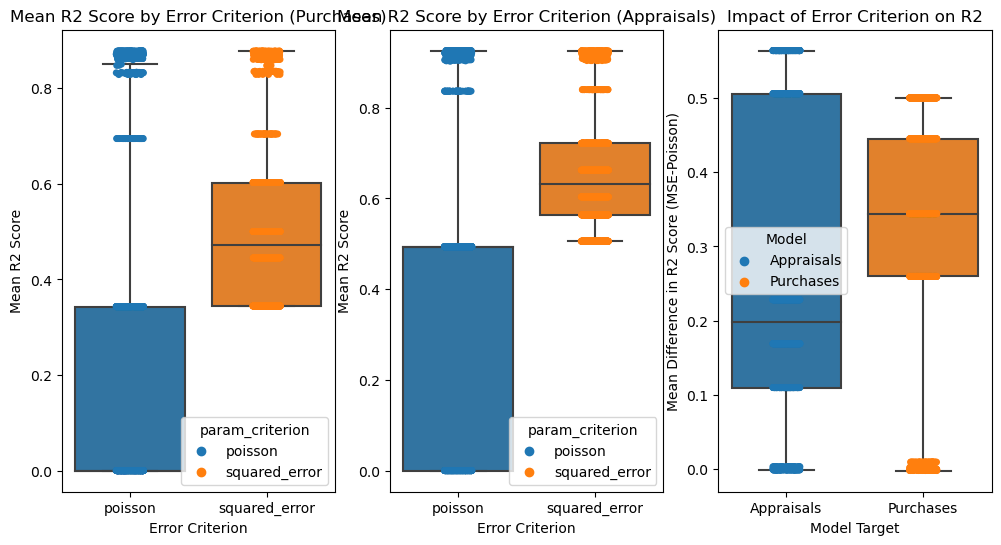

In [12]:
fig, axes = plt.subplots(1,3, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1, 1]})

sns.boxplot(data=purch_grid_results, y="mean_test_r2", x="param_criterion", fliersize=0, ax=axes[0])
sns.stripplot(data=purch_grid_results, y="mean_test_r2", x="param_criterion", hue="param_criterion", ax=axes[0])
axes[0].set_ylabel("Mean R2 Score")
axes[0].set_xlabel("Error Criterion")
axes[0].set_title("Mean R2 Score by Error Criterion\n(Purchases)")

sns.boxplot(data=appr_grid_results, y="mean_test_r2", x="param_criterion", fliersize=0, ax=axes[1])
sns.stripplot(data=appr_grid_results, y="mean_test_r2", x="param_criterion", hue="param_criterion", ax=axes[1])
axes[1].set_ylabel("Mean R2 Score")
axes[1].set_xlabel("Error Criterion")
axes[1].set_title("Mean R2 Score by Error Criterion\n(Appraisals)")

sns.boxplot(data=crit_diffs, y='R2 Difference', x="Model", fliersize=0, ax=axes[2])
sns.stripplot(data=crit_diffs, y='R2 Difference', x="Model", hue="Model", ax=axes[2])
axes[2].set_ylabel("Mean Difference in R2 Score (MSE-Poisson)")
axes[2].set_xlabel("Model Target")
axes[2].set_title("Impact of Error Criterion on R2")
plt.show()
plt.close()

#### Difference between parameter-paired results by model type.

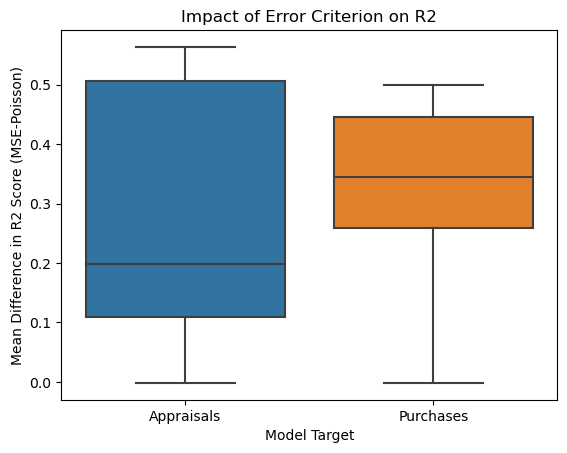

In [13]:
sns.boxplot(data=crit_diffs, y='R2 Difference', x="Model", fliersize=0)
plt.ylabel("Mean Difference in R2 Score (MSE-Poisson)")
plt.xlabel("Model Target")
plt.title("Impact of Error Criterion on R2")
plt.show()
plt.close()

### Negative Ordinal Cross Entropy Loss vs Criterion

#### Neg. Ordinal CE Loss distribution by criterion and model type

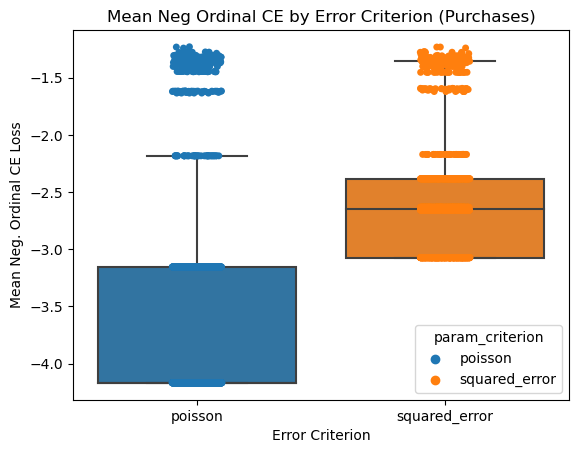

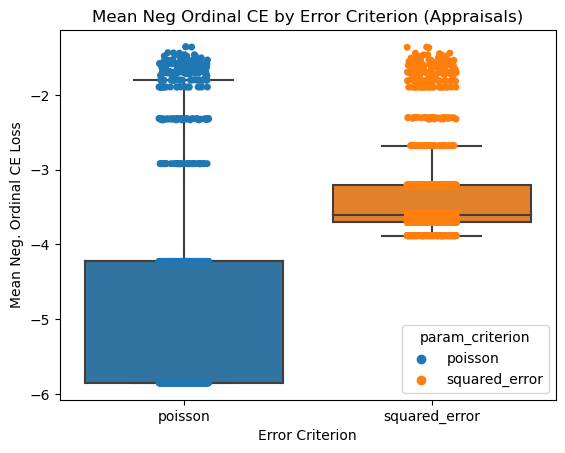

In [14]:
sns.boxplot(data=purch_grid_results, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", fliersize=0)
sns.stripplot(data=purch_grid_results, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", hue="param_criterion")
plt.ylabel("Mean Neg. Ordinal CE Loss")
plt.xlabel("Error Criterion")
plt.title("Mean Neg Ordinal CE by Error Criterion\n(Purchases)")
plt.show()
plt.close()
sns.boxplot(data=appr_grid_results, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", fliersize=0)
sns.stripplot(data=appr_grid_results, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", hue="param_criterion")
plt.ylabel("Mean Neg. Ordinal CE Loss")
plt.xlabel("Error Criterion")
plt.title("Mean Neg Ordinal CE by Error Criterion\n(Appraisals)")
plt.show()
plt.close()

#### Difference between parameter-paired results by model type.

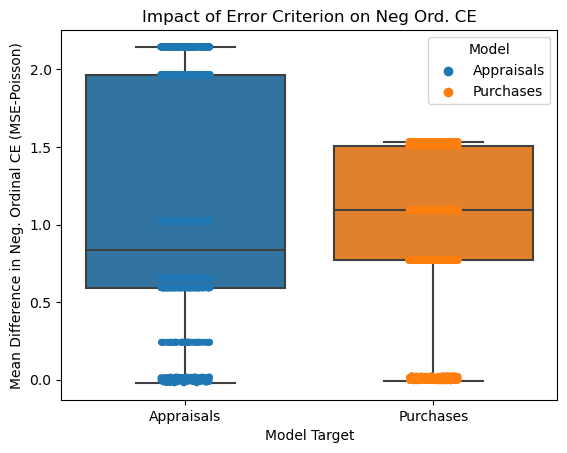

In [15]:
sns.boxplot(data=crit_diffs, y="Neg Ordinal CE Difference", x="Model", fliersize=0)
sns.stripplot(data=crit_diffs, y="Neg Ordinal CE Difference", x="Model", hue="Model")
plt.ylabel("Mean Difference in Neg. Ordinal CE (MSE-Poisson)")
plt.xlabel("Model Target")
plt.title("Impact of Error Criterion on Neg Ord. CE")
plt.show()
plt.close()

### Top Performing Models

In [16]:
N = 300 # This is about 10% of models, visually (see above) models in this range have R^2 > .9ish

In [17]:
top_r2_models = appr_grid_results["rank_test_r2"] < N
top_ord_ce_models = purch_grid_results["rank_test_neg_ordinal_cross_entropy"] < N
top_models = top_r2_models & top_ord_ce_models
appr_grid_results[top_models]["param_criterion"].value_counts()

poisson          149
squared_error    137
Name: param_criterion, dtype: int64

In [18]:
top_r2_models = purch_grid_results["rank_test_r2"] < N
top_ord_ce_models = purch_grid_results["rank_test_neg_ordinal_cross_entropy"] < N
top_models = top_r2_models & top_ord_ce_models
purch_grid_results[top_models]["param_criterion"].value_counts()

poisson          149
squared_error    138
Name: param_criterion, dtype: int64

## Mean Square Error vs Mean Poisson Deviance
* Overall, MSE outperforms Poisson for the error criterion.
    * This is true even for the purchase data where a Poisson fit the data very accurately
* Both can produce high-performing models.
    * Among the ~10% of top-peforming models things seem to be a bit more even, suggesting that if other parameters are well-optimized that error criterion stops mattering so much

In [19]:
from scipy.stats import pearsonr
group_vars = [p for p in PARAMS if "ccp" not in p]
score_metrics = ["mean_test_r2", "mean_test_neg_ordinal_cross_entropy"]

appr_grid_results = appr_grid_results.sort_values("param_ccp_alpha", ascending=True)
appr_ccp_alpha = appr_grid_results.groupby(group_vars)["mean_test_r2"].apply(lambda x: pearsonr(x, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])[0])
appr_r2_ccp_alpha = appr_ccp_alpha.mean()

purch_grid_results = purch_grid_results.sort_values("param_ccp_alpha", ascending=True)
purch_ccp_alpha = purch_grid_results.groupby(group_vars)["mean_test_r2"].apply(lambda x: pearsonr(x, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])[0])
purch_r2_ccp_alpha = purch_ccp_alpha.mean()

print(f"The mean Pearson correlation coefficient between R^2 and CCP Apha is {purch_r2_ccp_alpha:.4f} for purchases and {appr_r2_ccp_alpha:.4f} for appraisals")

The mean Pearson correlation coefficient between R^2 and CCP Apha is -0.8788 for purchases and -0.9409 for appraisals


## Other parameters

In [20]:
def boxplot_by_var(df, var: str, var_lbl: str, data_str: str):
    _df = df[[var, "mean_test_r2", "mean_test_neg_ordinal_cross_entropy"]].copy()
    if _df[var].apply(lambda x: pd.api.types.is_integer(x)).all():
        _df = _df.sort_values(var)
        _df[var] = df[var].astype(str)
    else:
        _df[var] = df[var].astype(str)
        _df = _df.sort_values(var)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})
    sns.boxplot(data=_df, x=var, y="mean_test_r2", ax=axes[0], fliersize=0)
    sns.stripplot(data=_df, x=var, y="mean_test_r2", hue=var, ax=axes[0], legend=False)
    axes[0].set_title(f'R2 by {var_lbl} ({data_str})')
    axes[0].set_xlabel(var_lbl)
    axes[0].set_ylabel('Mean R2')
    
    sns.boxplot(data=_df, x=var, y="mean_test_neg_ordinal_cross_entropy", ax=axes[1], fliersize=0)
    sns.stripplot(data=_df, x=var, y="mean_test_neg_ordinal_cross_entropy", hue=var, ax=axes[1])
    axes[1].set_title(f'Neg. Ordinal Cross-Entropy by {var_lbl} ({data_str})')
    axes[1].set_xlabel(var_lbl)
    axes[1].set_ylabel('Mean Neg. Ordinal Cross Entropy Loss')
    axes[1].legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    plt.close()

### CCP Alpha

appr_grid_results = appr_grid_results[appr_grid_results['param_criterion'] == "squared_error"].copy()
purch_grid_results = purch_grid_results[purch_grid_results['param_criterion'] == "squared_error"].copy()

In [21]:
from scipy.stats import pearsonr
group_vars = [p for p in PARAMS if "ccp" not in p]
score_metrics = ["mean_test_r2", "mean_test_neg_ordinal_cross_entropy"]

appr_grid_results = appr_grid_results.sort_values("param_ccp_alpha", ascending=True)
appr_ccp_alpha = appr_grid_results.groupby(group_vars)["mean_test_r2"].apply(lambda x: pearsonr(x, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])[0])
appr_r2_ccp_alpha = appr_ccp_alpha.mean()

purch_grid_results = purch_grid_results.sort_values("param_ccp_alpha", ascending=True)
purch_ccp_alpha = purch_grid_results.groupby(group_vars)["mean_test_r2"].apply(lambda x: pearsonr(x, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])[0])
purch_r2_ccp_alpha = purch_ccp_alpha.mean()

print(f"The mean Pearson correlation coefficient between R^2 and CCP Apha is {purch_r2_ccp_alpha:.4f} for purchases and {appr_r2_ccp_alpha:.4f} for appraisals")

The mean Pearson correlation coefficient between R^2 and CCP Apha is -0.8788 for purchases and -0.9409 for appraisals


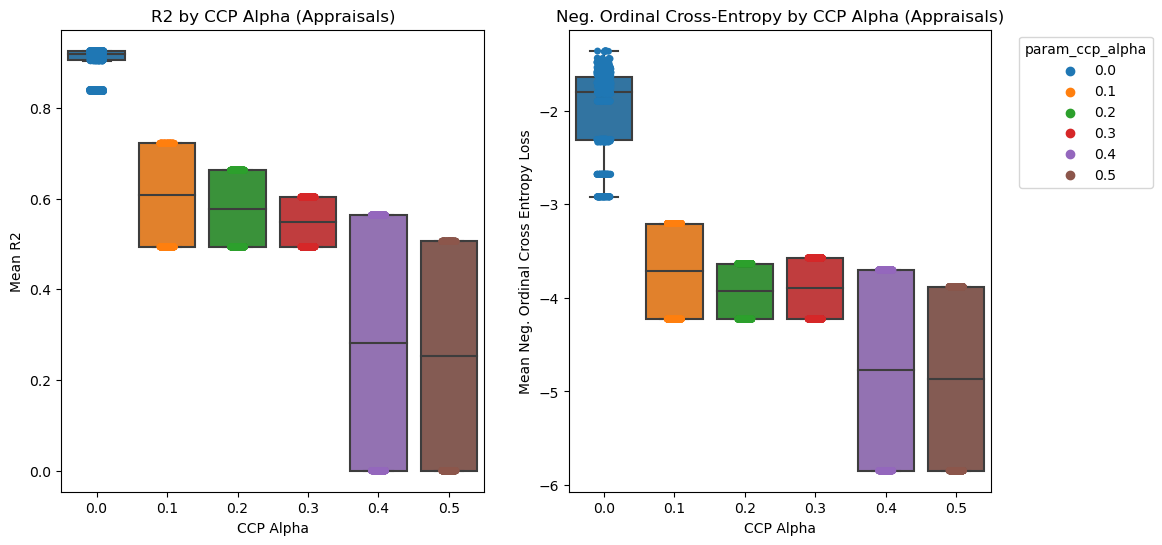

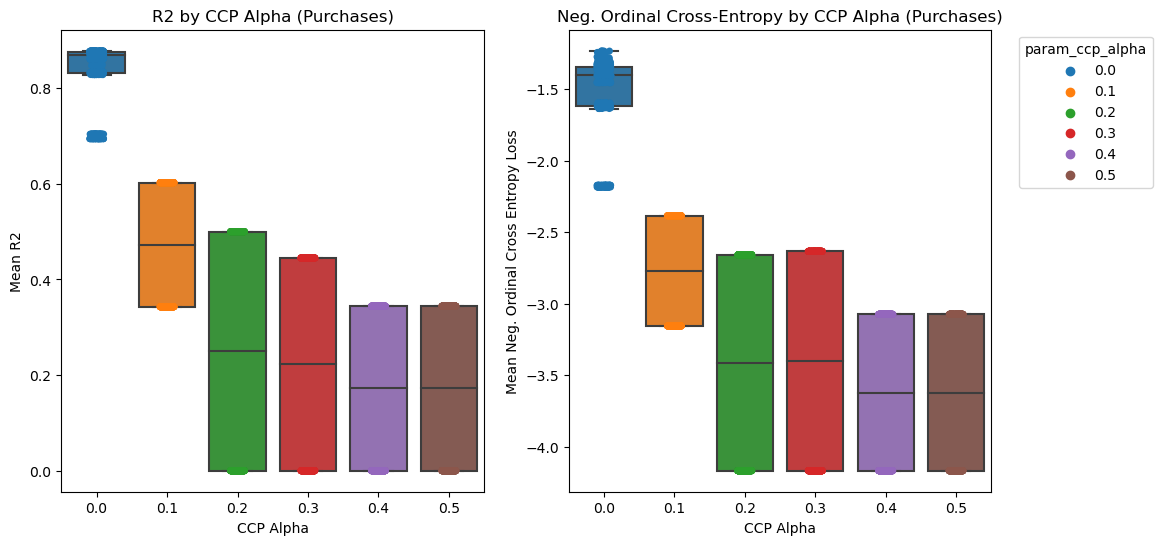

In [22]:
boxplot_by_var(appr_grid_results, "param_ccp_alpha", "CCP Alpha", "Appraisals")
boxplot_by_var(purch_grid_results, "param_ccp_alpha", "CCP Alpha", "Purchases")

In [23]:
purch_grid_results["param_max_depth"] = purch_grid_results["param_max_depth"].fillna("inf")
purch_grid_results["param_max_depth"] = purch_grid_results["param_max_depth"].astype(str)
purch_grid_results = purch_grid_results.sort_values("param_max_depth")
appr_grid_results["param_max_depth"] = appr_grid_results["param_max_depth"].fillna("inf")
appr_grid_results["param_max_depth"] = appr_grid_results["param_max_depth"].astype(str)
appr_grid_results = appr_grid_results.sort_values("param_max_depth")

In [24]:
appr_grid_results2 = appr_grid_results[appr_grid_results['param_ccp_alpha'] == 0.0].copy()
purch_grid_results2 = purch_grid_results[purch_grid_results['param_ccp_alpha'] == 0.0].copy()

### Max Tree Depth

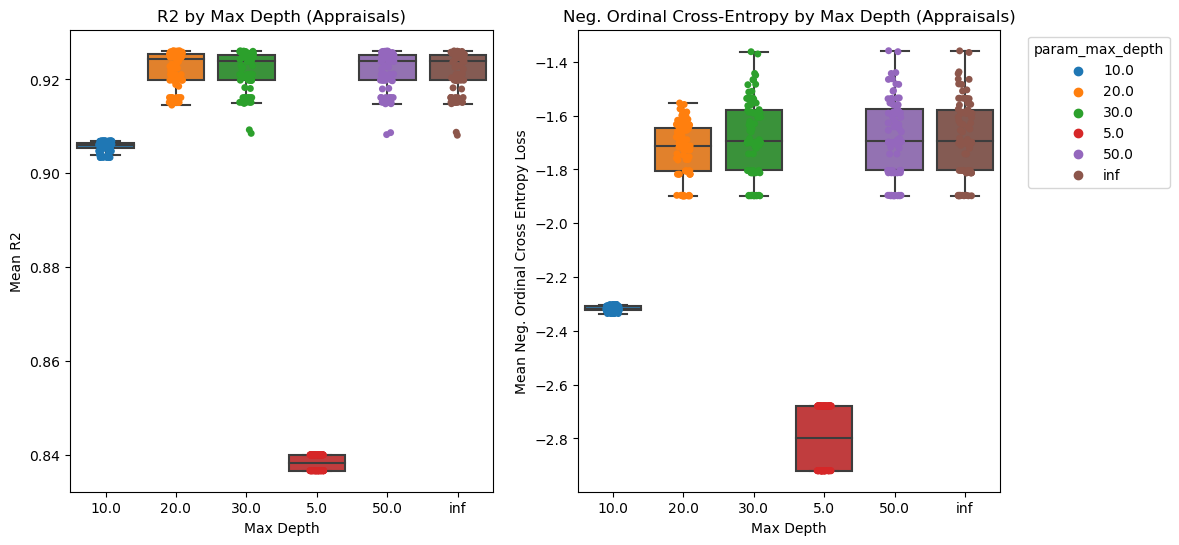

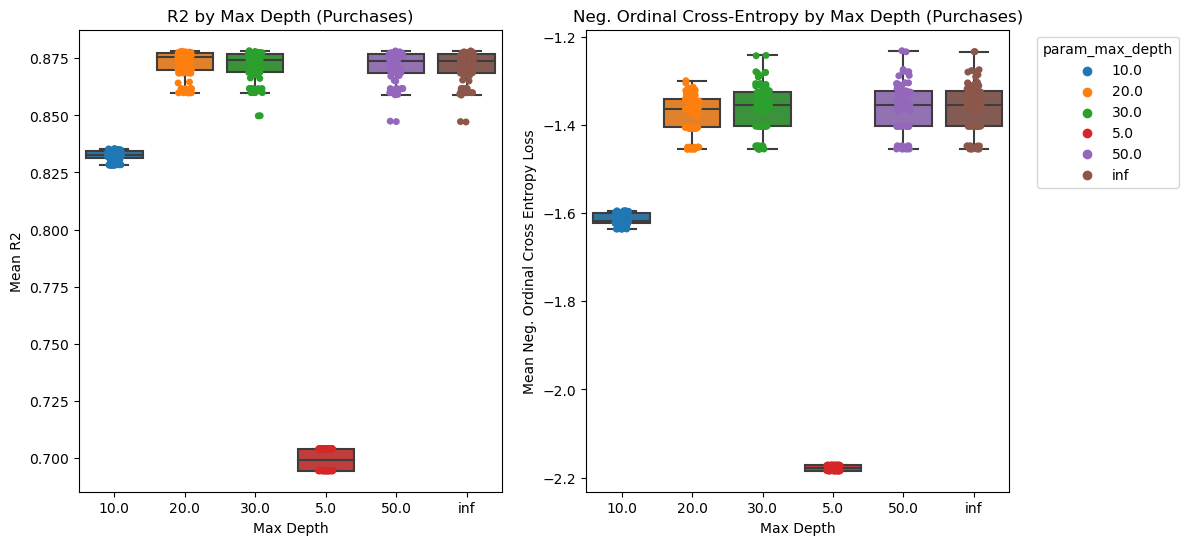

In [25]:
boxplot_by_var(appr_grid_results2, "param_max_depth", "Max Depth", "Appraisals")
boxplot_by_var(purch_grid_results2, "param_max_depth", "Max Depth", "Purchases")

In [26]:
good_max_depth = ["10.0","20.0", "30.0", "50.0", "inf"]
appr_grid_results3 = appr_grid_results2[appr_grid_results2['param_max_depth'].isin(good_max_depth)].copy()
purch_grid_results3 = purch_grid_results2[purch_grid_results2['param_max_depth'].isin(good_max_depth)].copy()

### Min Samples/Split

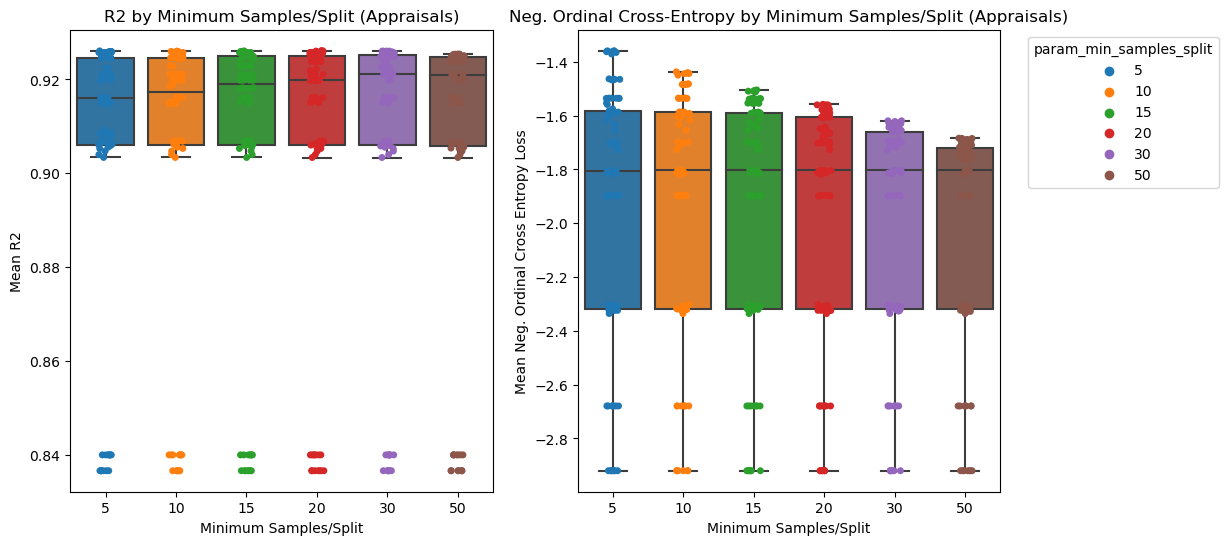

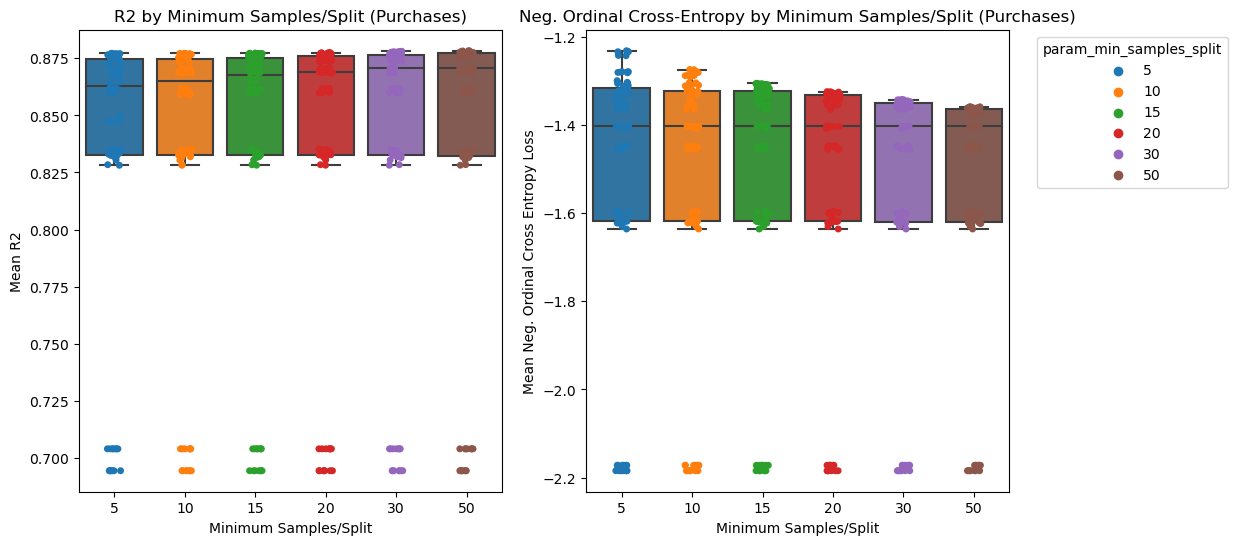

In [27]:
boxplot_by_var(appr_grid_results2, "param_min_samples_split", "Minimum Samples/Split", "Appraisals")
boxplot_by_var(purch_grid_results2, "param_min_samples_split", "Minimum Samples/Split", "Purchases")

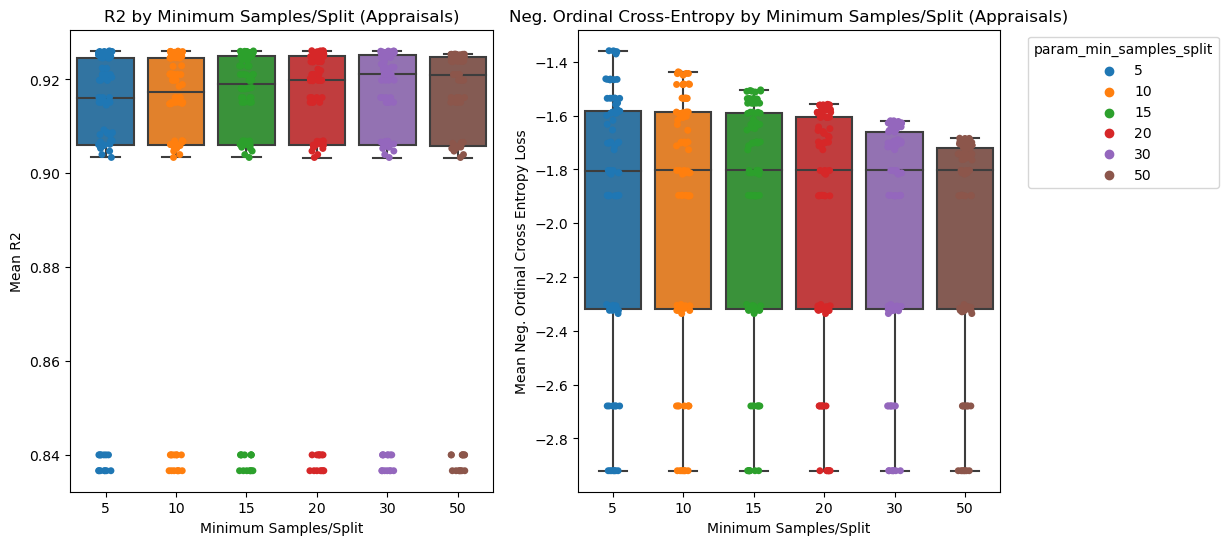

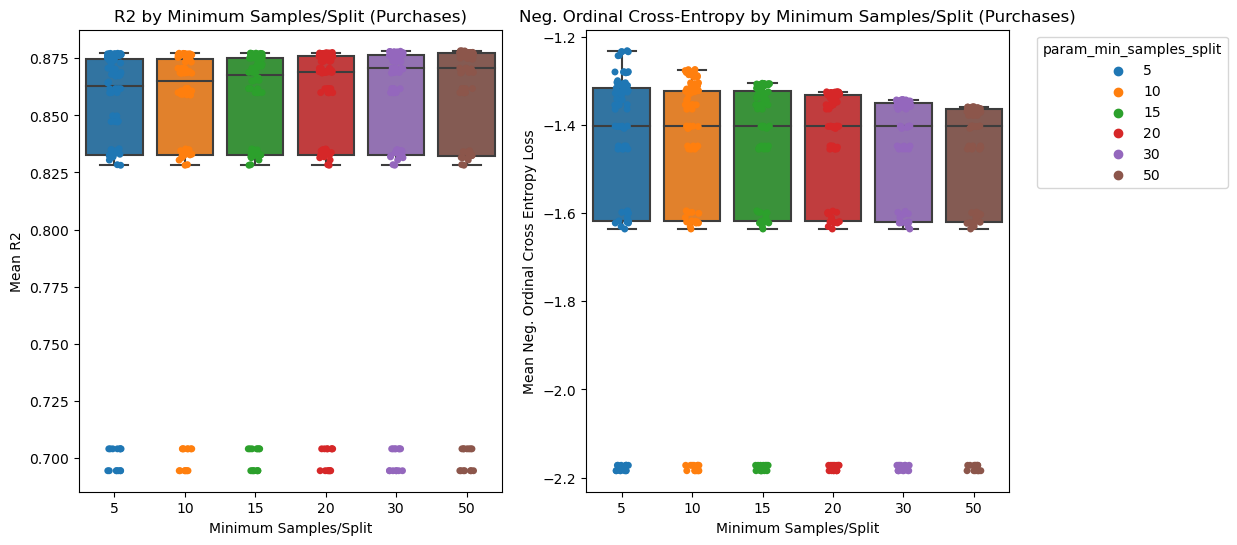

In [28]:
boxplot_by_var(appr_grid_results2, "param_min_samples_split", "Minimum Samples/Split", "Appraisals")
boxplot_by_var(purch_grid_results2, "param_min_samples_split", "Minimum Samples/Split", "Purchases")

### Min Samples/Leaf

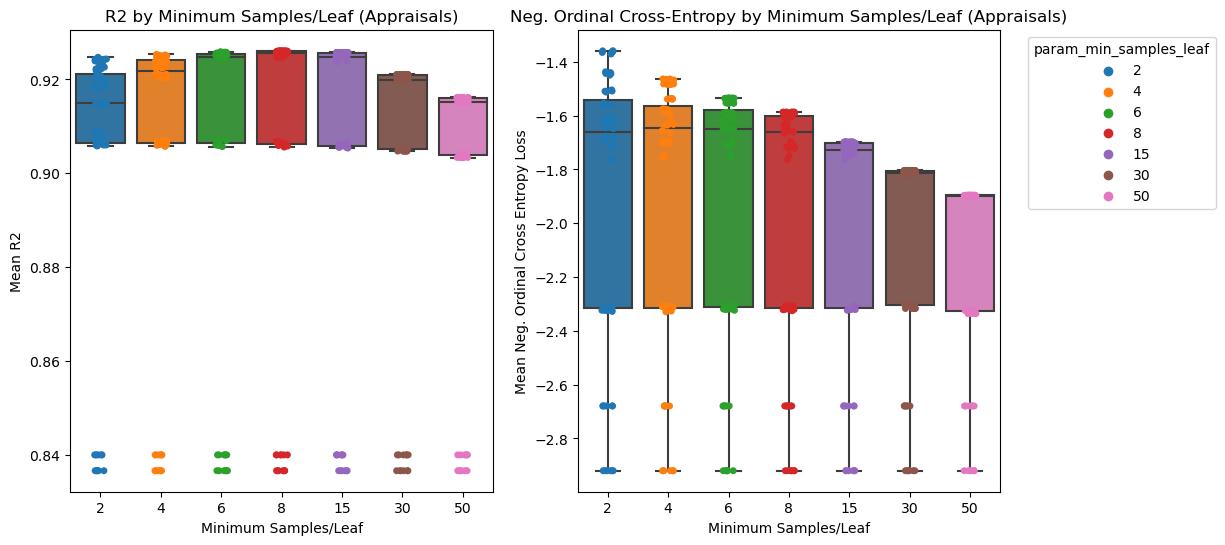

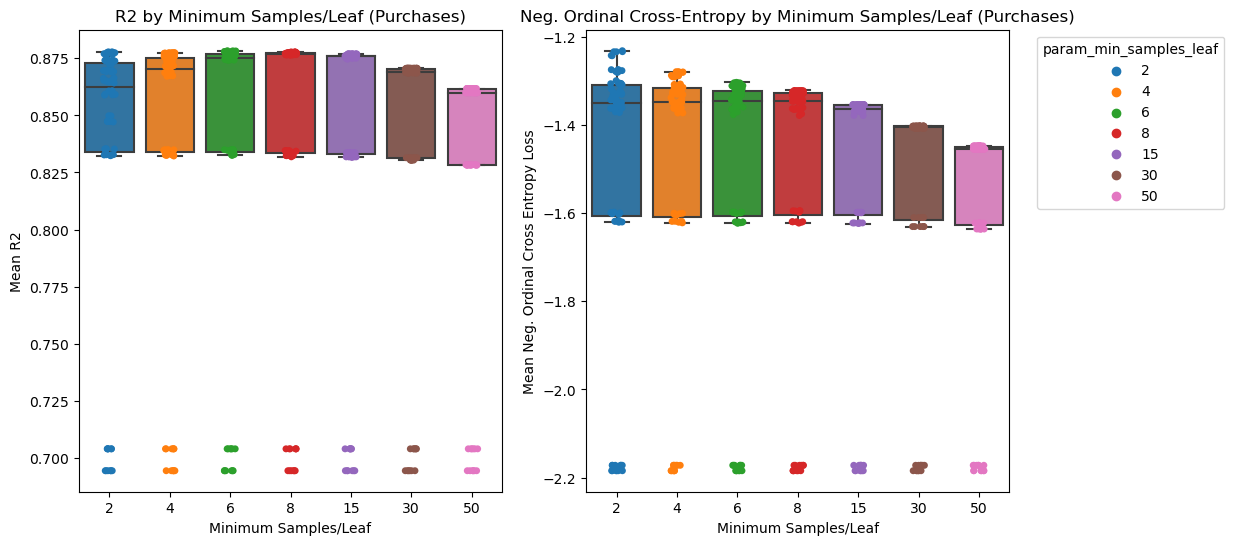

In [29]:
boxplot_by_var(appr_grid_results2, "param_min_samples_leaf", "Minimum Samples/Leaf", "Appraisals")
boxplot_by_var(purch_grid_results2, "param_min_samples_leaf", "Minimum Samples/Leaf", "Purchases")

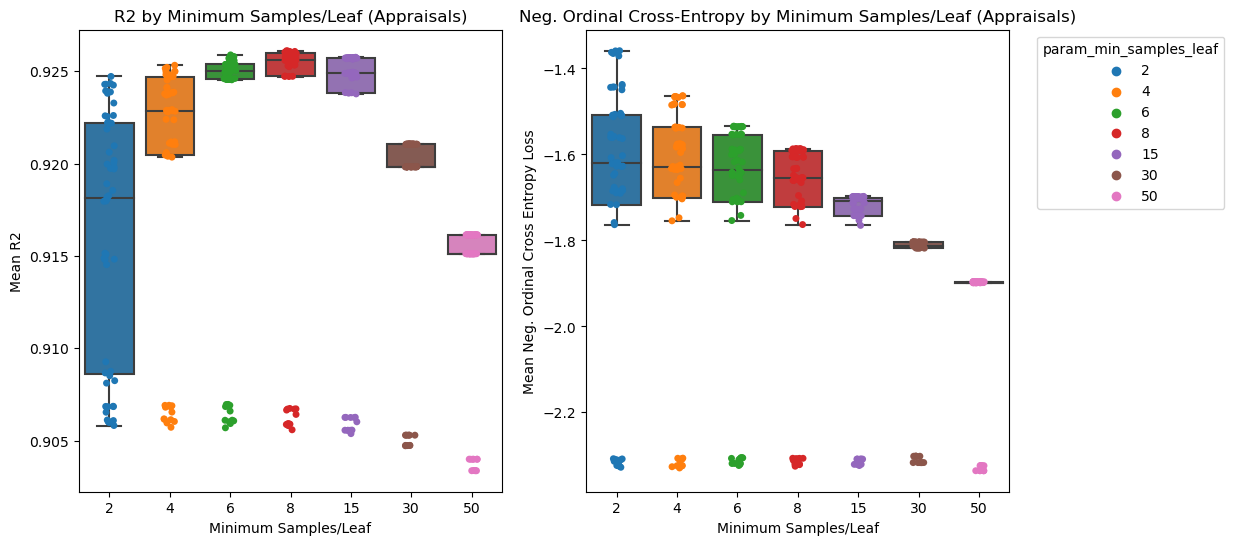

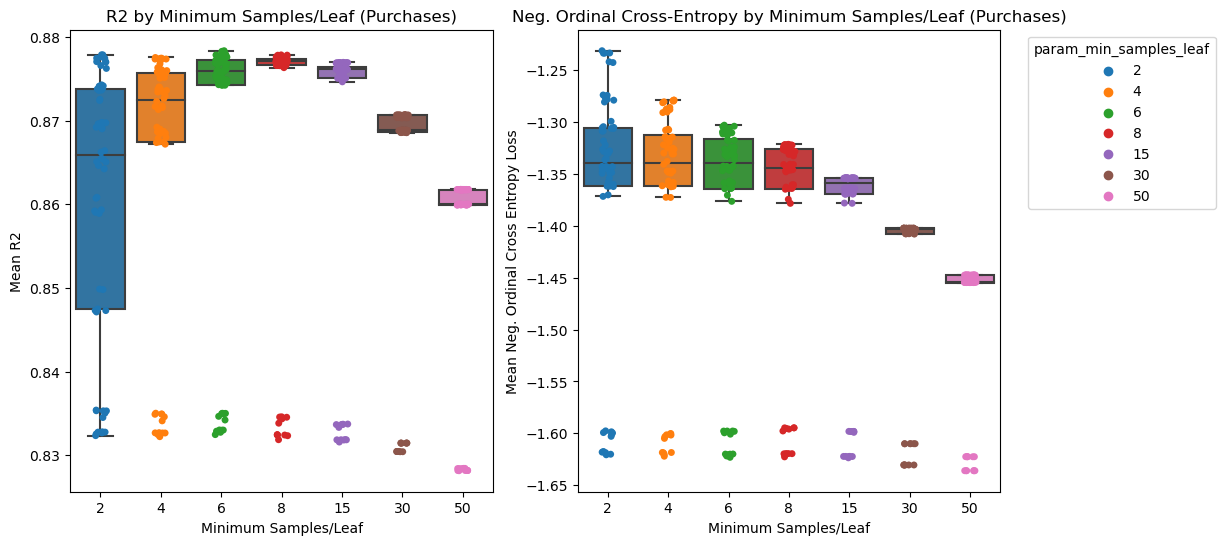

In [30]:
boxplot_by_var(appr_grid_results3, "param_min_samples_leaf", "Minimum Samples/Leaf", "Appraisals")
boxplot_by_var(purch_grid_results3, "param_min_samples_leaf", "Minimum Samples/Leaf", "Purchases")

In [31]:
appr_grid_results4 = appr_grid_results3[appr_grid_results3["param_min_samples_leaf"] < 30]
purch_grid_results4 = purch_grid_results3[purch_grid_results3["param_min_samples_leaf"] < 30]

## Good and Bad Parameters
We can rule out several parameters as having universally negative impact on model performance.
Primarily these are CCP alpha, low max tree depth, and excessive minimum samples/leaf.
MSE is almost always better than Poisson, but this is less true after filtering out bad settings (see below, possibly tends slightly better).

CCP Alpha = 0 (or less than .1)
Max tree depth > 10 <= 50
Min samples/leaf < 30
Min samples/split doesn't seem to matter too much (at least overall after bad parameters are removed)

In [32]:
group_vars = [p for p in PARAMS if "criterion" not in p]
score_metrics = ["mean_test_r2", "mean_test_neg_ordinal_cross_entropy"]
score_diff_mapper = {
    "mean_test_r2": "R2 Difference",
    "mean_test_neg_ordinal_cross_entropy": "Neg Ordinal CE Difference"
    }

appr_grid_results4 = appr_grid_results4.sort_values("param_criterion")
appr_crit_diffs = appr_grid_results4.groupby(group_vars)[score_metrics].diff()
appr_crit_diffs = appr_crit_diffs[~appr_crit_diffs.isna().any(axis=1)]
appr_crit_diffs = appr_crit_diffs.rename(columns=score_diff_mapper)
appr_crit_diffs["Model"] = "Appraisals"

purch_grid_results4 = purch_grid_results4.sort_values("param_criterion")
purch_crit_diffs = purch_grid_results4.groupby(group_vars)[score_metrics].diff()
purch_crit_diffs = purch_crit_diffs[~purch_crit_diffs.isna().any(axis=1)]
purch_crit_diffs = purch_crit_diffs.rename(columns=score_diff_mapper)
purch_crit_diffs["Model"] = "Purchases"

crit_diffs = pd.concat([appr_crit_diffs, purch_crit_diffs])

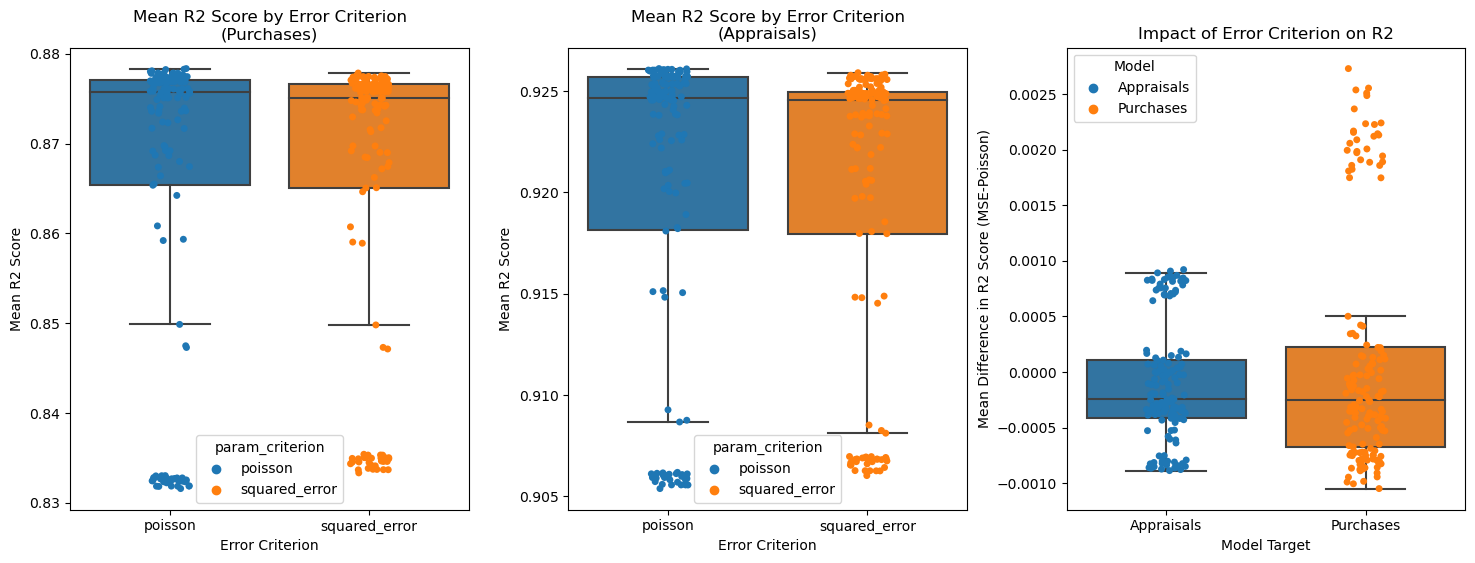

In [39]:
fig, axes = plt.subplots(1,3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1], "wspace": .25})

sns.boxplot(data=purch_grid_results4, y="mean_test_r2", x="param_criterion", fliersize=0, ax=axes[0])
sns.stripplot(data=purch_grid_results4, y="mean_test_r2", x="param_criterion", hue="param_criterion", ax=axes[0])
axes[0].set_ylabel("Mean R2 Score")
axes[0].set_xlabel("Error Criterion")
axes[0].set_title("Mean R2 Score by Error Criterion\n(Purchases)")

sns.boxplot(data=appr_grid_results4, y="mean_test_r2", x="param_criterion", fliersize=0, ax=axes[1])
sns.stripplot(data=appr_grid_results4, y="mean_test_r2", x="param_criterion", hue="param_criterion", ax=axes[1])
axes[1].set_ylabel("Mean R2 Score")
axes[1].set_xlabel("Error Criterion")
axes[1].set_title("Mean R2 Score by Error Criterion\n(Appraisals)")

sns.boxplot(data=crit_diffs, y='R2 Difference', x="Model", fliersize=0, ax=axes[2])
sns.stripplot(data=crit_diffs, y='R2 Difference', x="Model", hue="Model", ax=axes[2])
axes[2].set_ylabel("Mean Difference in R2 Score (MSE-Poisson)")
axes[2].set_xlabel("Model Target")
axes[2].set_title("Impact of Error Criterion on R2")
plt.show()
plt.close()

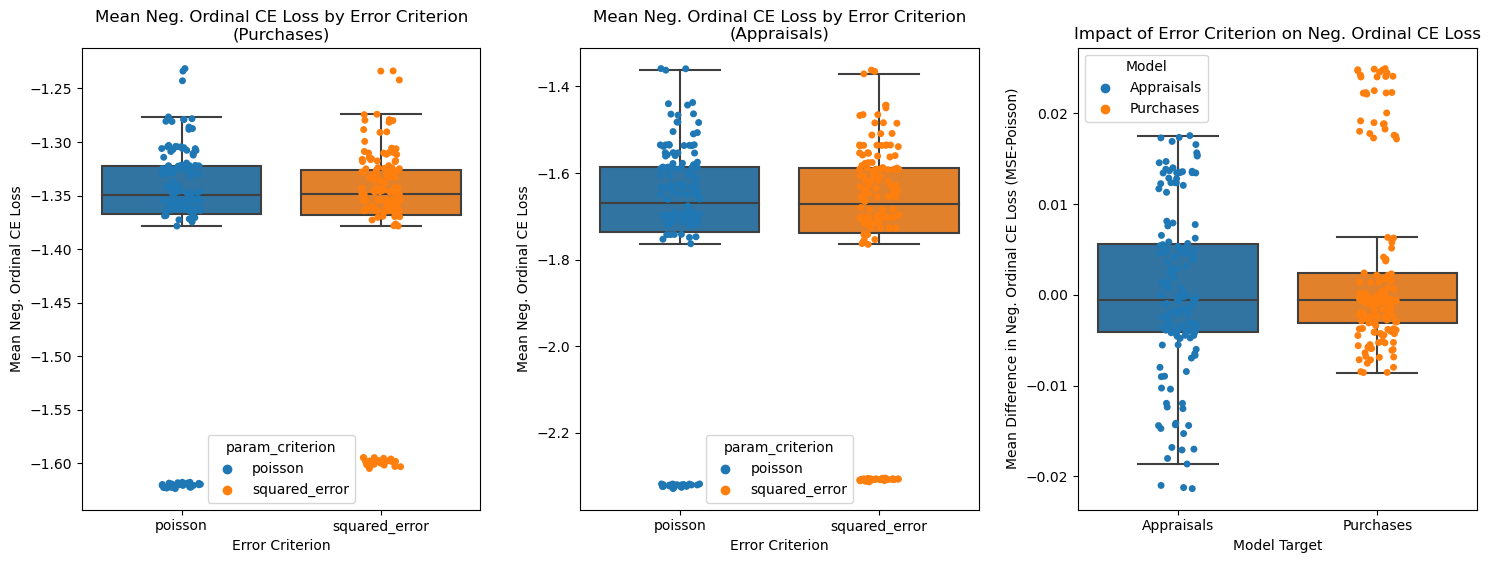

In [41]:
fig, axes = plt.subplots(1,3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1], "wspace": .25})

sns.boxplot(data=purch_grid_results4, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", fliersize=0, ax=axes[0])
sns.stripplot(data=purch_grid_results4, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", hue="param_criterion", ax=axes[0])
axes[0].set_ylabel("Mean Neg. Ordinal CE Loss")
axes[0].set_xlabel("Error Criterion")
axes[0].set_title("Mean Neg. Ordinal CE Loss by Error Criterion\n(Purchases)")

sns.boxplot(data=appr_grid_results4, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", fliersize=0, ax=axes[1])
sns.stripplot(data=appr_grid_results4, y="mean_test_neg_ordinal_cross_entropy", x="param_criterion", hue="param_criterion", ax=axes[1])
axes[1].set_ylabel("Mean Neg. Ordinal CE Loss")
axes[1].set_xlabel("Error Criterion")
axes[1].set_title("Mean Neg. Ordinal CE Loss by Error Criterion\n(Appraisals)")

sns.boxplot(data=crit_diffs, y="Neg Ordinal CE Difference", x="Model", fliersize=0, ax=axes[2])
sns.stripplot(data=crit_diffs, y="Neg Ordinal CE Difference", x="Model", hue="Model", ax=axes[2])
axes[2].set_ylabel("Mean Difference in Neg. Ordinal CE Loss (MSE-Poisson)")
axes[2].set_xlabel("Model Target")
axes[2].set_title("Impact of Error Criterion on Neg. Ordinal CE Loss")
plt.show()
plt.close()